<a href="https://colab.research.google.com/github/nehasupe/Samples/blob/master/SQL_NoSQL_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', 150)

store_df = pd.read_csv("googleplaystore.csv")
reviews_df = pd.read_csv("googleplaystore_user_reviews.csv")

# Introducing the dataset
# Size of the dataset and features
print("Size of dataset:")
print("1. google play store")
print("Number of features: ", store_df.shape[1])
print("Number of rows: ", store_df.shape[0])
print("feature names: ")
for col in store_df.columns:
  print(col, ":\t" ,store_df.dtypes[col])

print()
print("--------------------------------------------------")

print("2. google play store user reviews")
print("Number of features: ", reviews_df.shape[1])
print("Number of rows: ", reviews_df.shape[0])
print("feature names: ")
for col in reviews_df.columns:
  print(col,":\t" ,reviews_df.dtypes[col])

Size of dataset:
1. google play store
Number of features:  13
Number of rows:  10841
feature names: 
App :	 object
Category :	 object
Rating :	 float64
Reviews :	 object
Size :	 object
Installs :	 object
Type :	 object
Price :	 object
Content Rating :	 object
Genres :	 object
Last Updated :	 object
Current Ver :	 object
Android Ver :	 object

--------------------------------------------------
2. google play store user reviews
Number of features:  5
Number of rows:  64295
feature names: 
App :	 object
Translated_Review :	 object
Sentiment :	 object
Sentiment_Polarity :	 float64
Sentiment_Subjectivity :	 float64


Obesrvations:

---



---


The data type needs to be converted to a format so that models can be trained
About 10K rows. should be enough to train regression models.

# Data cleaning

Finding outliers/ wrong values, missing values

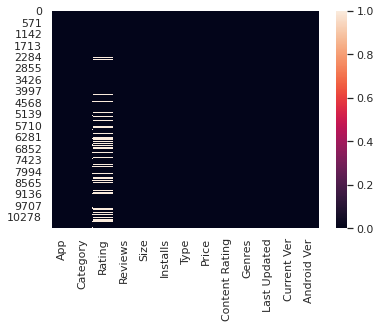

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(store_df.isnull()) 


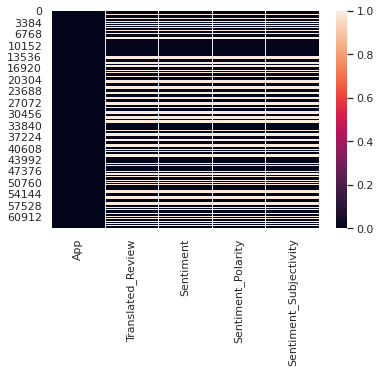

In [0]:
sns.heatmap(reviews_df.isnull())

In [0]:
# References: https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'No of missing values', 1 : '%'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '%', ascending=False).round(1)
        
        return mis_val_table_ren_columns

In [0]:
missing_values_table(store_df)

,No of missing values,%
Rating,1474,13.6
Current Ver,8,0.1
Android Ver,3,0.0
Type,1,0.0
Content Rating,1,0.0


In [0]:
missing_values_table(reviews_df)

,No of missing values,%
Translated_Review,26868,41.8
Sentiment,26863,41.8
Sentiment_Polarity,26863,41.8
Sentiment_Subjectivity,26863,41.8


Removing the missing values and anomalies from the dataset

In [0]:
# cleaning the dataset- removing the missing values and outliers/anamolies
store_df.head()

print(store_df['Category'].unique())
print(store_df['Category'].value_counts())
store_df = store_df[store_df['Category'] != '1.9']
print(store_df['Category'].unique())
print(store_df.shape)

print(store_df['Type'].unique())
print(store_df['Type'].value_counts())
store_df = store_df[store_df['Type'].notnull()]
print(store_df['Type'].unique())
print(store_df.shape)

print(store_df['Content Rating'].unique())
print(store_df['Content Rating'].value_counts())
store_df['Content Rating'] = store_df['Content Rating'].replace('Mature 17+', 'Mature')
store_df['Content Rating'] = store_df['Content Rating'].replace('Adults only 18+', 'Mature')
store_df['Content Rating'] = store_df['Content Rating'].replace('Everyone 10+', 'Teen')
store_df = store_df[store_df['Content Rating'] != 'Unrated']
print(store_df.head())
print(store_df['Content Rating'].unique())

print(store_df['Genres'].unique())
print(store_df['Genres'].value_counts())

# creating 
print(len(store_df['Category'].unique()))
print(len(store_df['Type'].unique()))
print(len(store_df['Content Rating'].unique()))
print(len(store_df['Genres'].unique()))

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     



There are 13 columns in googleplaystore.csv
Unique feature to identigy rows- App

Training features:
Categorical features- Category, type, content rating, genres
The categorical features- one hot encoding or encode (convert to a numerical value) 

Continuous features- Reviews, Size, Installs, Price, Last Updated, Current Ver, Android Ver

Check if these are in proper numerical formats 

Target feature: Rating 

In [0]:
from sklearn import preprocessing
import time
import datetime
# continuous features.
# Reviews, Size, Installs, Price, Last Updated, Current Ver, Android Ver
# Reviews- dont need to filter or modify values- scale
# Size
# Installs- needs to be just a float number, contains + and ,
# Price- has $ sign before the number, need to remove $ 

# Reviews

# Size feature has values in k, M and varies with device
indexs = store_df['Size'].loc[store_df['Size'].str.contains('k')].index.tolist()
size_in_MB = pd.DataFrame(store_df.loc[indexs, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).astype(str))
store_df.loc[indexs,'Size'] = size_in_MB
store_df['Size'] = store_df['Size'].apply(lambda x : x.strip('M'))
store_size = store_df['Size'].replace('Varies with device', 0).astype(float)
store_df['Size'] = store_df['Size'].replace('Varies with device', store_size.mean())

## replace nan with mean

store_df['Installs'] = store_df['Installs'].apply(lambda x : x.strip('+'))
store_df['Installs'] = store_df['Installs'].apply(lambda x : x.replace(',',''))
store_df['Price'] = store_df['Price'].apply(lambda x : x.strip('$'))

store_df['Last Updated'] = store_df['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))

# Rating
#store_df = store_df[(store_df['Rating'] <= 5) and (store_df['Rating'] >= 0)]

print(store_df.head())

store_df['Reviews'] = store_df['Reviews'].astype(float)
store_df['Size'] = store_df['Size'].astype(float)
store_df['Installs'] = store_df['Installs'].astype(float)
store_df['Price'] = store_df['Price'].astype(float)
store_df['Last Updated'] = store_df['Last Updated'].astype(float)
#store_df['Current Ver'] = store_df['Current Ver'].astype(float)
#store_df['Android Ver'] = store_df['Android Ver'].astype(float)
store_df['Rating'] = store_df['Rating'].astype(float)

                                                  App  ...   Android Ver
0      Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
1                                 Coloring book moana  ...  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide Apps  ...  4.0.3 and up
3                               Sketch - Draw & Paint  ...    4.2 and up
4               Pixel Draw - Number Art Coloring Book  ...    4.4 and up

[5 rows x 13 columns]


# Queries and Visualization

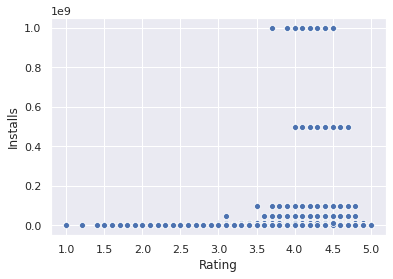

In [0]:
ax = sns.scatterplot(x="Rating", y="Installs", data=store_df)

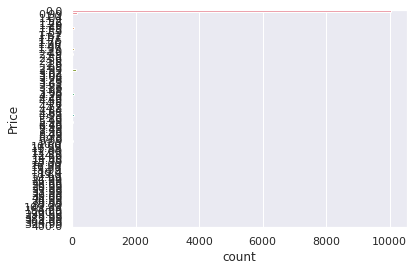

In [0]:
ax = sns.countplot(y="Price", data=store_df)

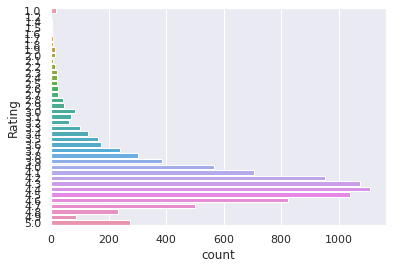

In [0]:
ax = sns.countplot(y="Rating", data=store_df)

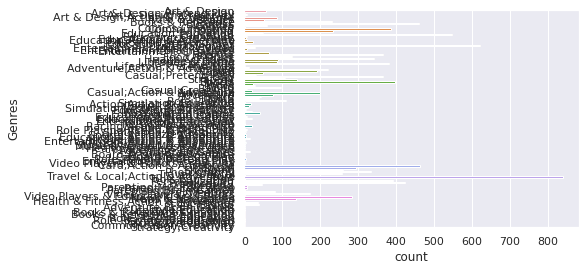

In [0]:
ax = sns.countplot(y="Genres", data=store_df)

In [0]:
store_df = store_df.dropna()

Performing some more queries on store_df

Average rating 4.191847419596116
Median rating 4.3
Standard deviation of rating 0.5152896253182208
the range where the maximum ratings lie 3.6765577942778953 - 4.707137044914337
The ratings which lie in range
Rating >3.6765577942778953 and Rating <4.707137044914337
Number of apps in the range:  7695
Number of apps not in the range 1664
Plotting on in graph


count    9359.000000
mean        4.191847
std         0.515290
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

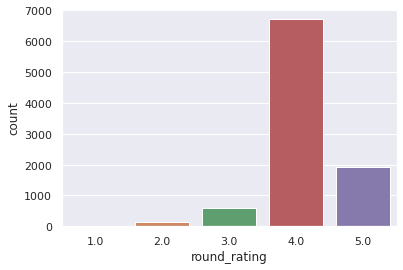

In [0]:
# Average rating
mean = store_df['Rating'].mean()
print("Average rating", mean)
# Median rating
median = store_df['Rating'].median()
print("Median rating", median)
# standard deviation in Rating
std_dev = store_df['Rating'].std()
print("Standard deviation of rating", std_dev)
# Range of rating where maximum rating lie
lower = mean - std_dev
higher = mean + std_dev
print("the range where the maximum ratings lie", lower,"-", higher)
print("The ratings which lie in range")
query1 = "Rating >"+ str(lower)+" and Rating <"+ str(higher)+""
print(query1)
df_1 = store_df.query(query1)
count_rating = df_1.shape[0]
print("Number of apps in the range: ", count_rating)
rest_app_count = store_df.shape[0]-df_1.shape[0]
print("Number of apps not in the range", rest_app_count)

print("Plotting on in graph")
df_1 = df_1.sort_values("Rating", ascending = True)

#rate['buckets'] = pd.cut(store_df['Rating'], bins= 5)
# rate = pd.qcut(store_df['Rating'], q = [.2, 0.4, 0.6, 0.8, 1])
#rate = rate.groupby('buckets').sum()
#rate.plot(kind='bar')
#.plot.area()
store_df['round_rating'] = store_df['Rating'].round(decimals=0)
ax = sns.countplot(x="round_rating", data=store_df)

store_df['Rating'].describe()


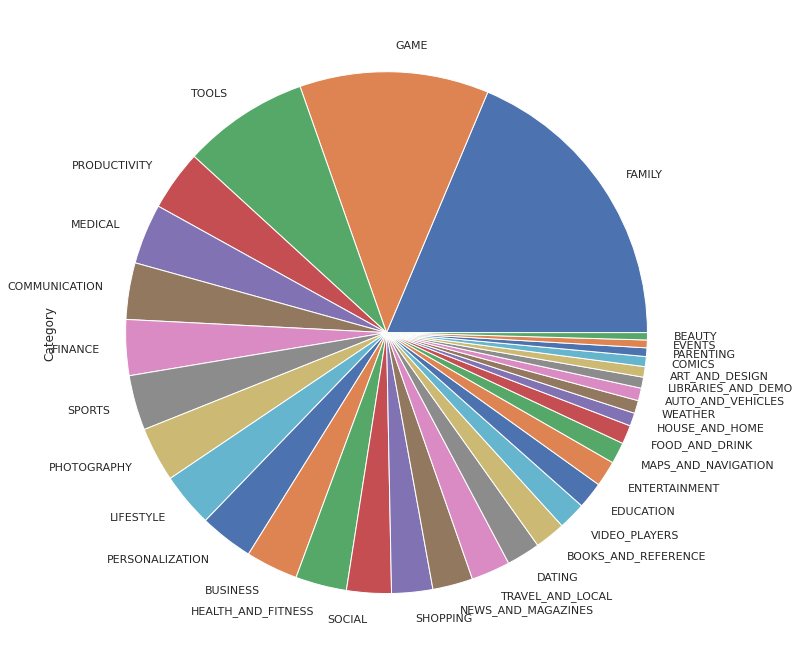

In [0]:
df_2 = store_df['Category'].value_counts()
#df_2 = store_df['Category']
df_2.plot.pie(figsize=(12, 12))


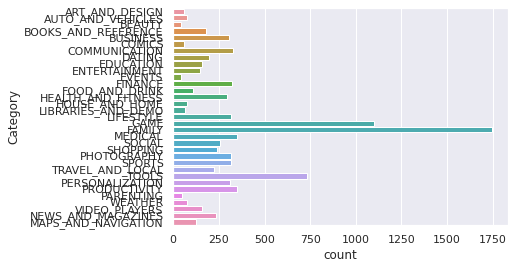

In [0]:
#cat = sns.load_dataset("googleplaystore.csv")
ax = sns.countplot(y="Category", data=store_df)

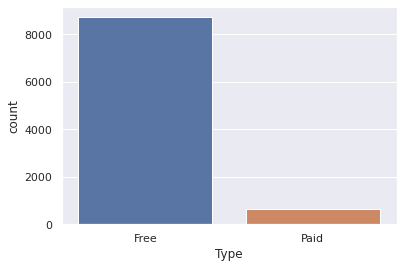

In [0]:
ax = sns.countplot(x="Type", data=store_df)

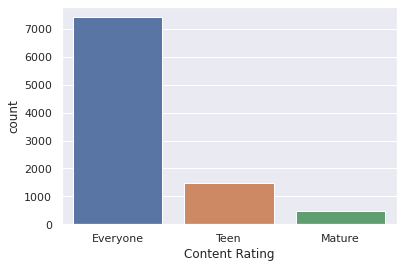

In [0]:
ax = sns.countplot(x="Content Rating", data=store_df)

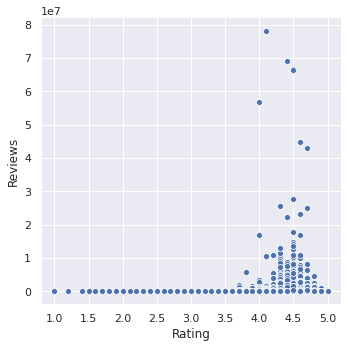

In [0]:
sns.relplot(x="Rating", y="Reviews", data = store_df)

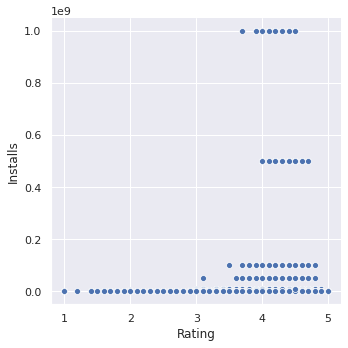

In [0]:
sns.relplot(x="Rating", y="Installs", data = store_df)

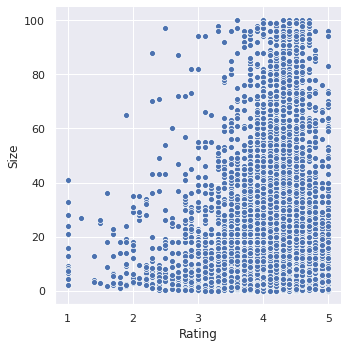

In [0]:
sns.relplot(x="Rating", y="Size", data = store_df)

In [0]:
print(store_df['Installs'].mean())

17910657.328560743


In [0]:
df_5 = store_df[store_df['Installs'] > 1000000]
df_5 = df_5[df_5['Rating'] <2.5]
df_5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,round_rating
5048,AppFinder by AppTap,TOOLS,2.0,2221.0,4.9,5000000.0,Free,0.0,Everyone,Tools,1.506989e+09,1.8.2.7,5.0 and up,2.0


Here I was checking if there is any app which has a rating lower than 2.5 but has installs over 1M. Meaning the app has many users but the users are not happy with the app

In [0]:
print(store_df['round_rating'].groupby(store_df['Type']).count())

Type
Free    8714
Paid     645
Name: round_rating, dtype: int64


# Processing and normalizing the values for training

In [0]:
# perform one hot encoding
encode_cols = ['Category', 'Type', 'Content Rating']
store_df = pd.get_dummies(store_df, columns =encode_cols , drop_first=True, prefix='encode')
#store_df = store_df.drop(encode_cols, axis=1)
print(store_df)

                                                      App  ...  encode_Teen
0          Photo Editor & Candy Camera & Grid & ScrapBook  ...            0
1                                     Coloring book moana  ...            0
2      U Launcher Lite – FREE Live Cool Themes, Hide Apps  ...            0
3                                   Sketch - Draw & Paint  ...            1
4                   Pixel Draw - Number Art Coloring Book  ...            0
...                                                   ...  ...          ...
10834                                       FR Calculator  ...            0
10836                                    Sya9a Maroc - FR  ...            0
10837                    Fr. Mike Schmitz Audio Teachings  ...            0
10839                       The SCP Foundation DB fr nn5n  ...            0
10840       iHoroscope - 2018 Daily Horoscope & Astrology  ...            0

[9359 rows x 46 columns]


In [0]:
# continus values reviews, size, installs, price
scale_cols = ['Reviews', 'Size', 'Installs', 'Price']
for x in scale_cols:
		store_df[x] = (store_df[x]-store_df[x].mean())/store_df[x].std()
print(store_df.head())

                                                  App  ...  encode_Teen
0      Photo Editor & Candy Camera & Grid & ScrapBook  ...            0
1                                 Coloring book moana  ...            0
2  U Launcher Lite – FREE Live Cool Themes, Hide Apps  ...            0
3                               Sketch - Draw & Paint  ...            1
4               Pixel Draw - Number Art Coloring Book  ...            0

[5 rows x 46 columns]


In [0]:
store_df = store_df.drop(['Current Ver', 'Android Ver','Genres'], axis=1)


In [0]:
store_df = store_df.drop(['round_rating'], axis=1)

# Task 1: models

In [0]:
# Model
from sklearn.model_selection import train_test_split

y = store_df['Rating']
X_df = store_df.drop(['App', 'Rating'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6551, 40)
(2808, 40)
(6551,)
(2808,)


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(metrics.mean_squared_error(y_test, y_pred))
#for a in zip(y_test, y_pred):
#  print(a)

0.25835677669847384


In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor(n_estimators=50, bootstrap = True)
# Fit on training data
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred))
#for i in range(len(y_pred)):
#for a in zip(y_test, y_pred):
#  print(a)


regressor = KNeighborsRegressor()
# Fit on training data
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred))
#for i in range(len(y_pred)):
#for a in zip(y_test, y_pred):
#  print(a)



0.22910088888888885
0.30231424501424503


# Task 2: 

Review sentiment analysis:

Classifying reviews as Positive, Neutral or Negative

First we check the number of reviews for each class

In [0]:
print(reviews_df.shape)
reviews_df = reviews_df.dropna()
print(reviews_df.shape)
print(reviews_df['Sentiment'].unique())

(64295, 5)
(37427, 5)
['Positive' 'Neutral' 'Negative']


Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64


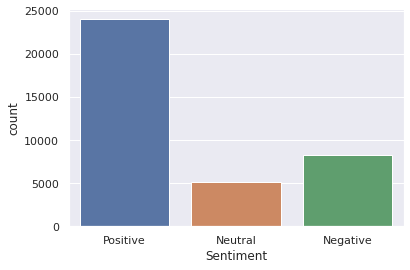

In [0]:
ax = sns.countplot(x="Sentiment", data=reviews_df)
print(reviews_df.Sentiment.value_counts())

the samples for each set are too much 

We need to split the dataset into- train and test, preprocess data to remove punctuation

Remove Punctuation
Tokenization
Removing stop words
Stemming/lemmatization

In [0]:
pd.set_option('display.max_colwidth', 150)
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [0]:
# references for remving punctuation: https://www.youtube.com/watch?v=9CpID8ZL1IQ
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
def remove_punctuation(text):
  no_punc = "".join([c for c in text if c not in string.punctuation])
  return no_punc

In [0]:
reviews_df['clean_reviews'] = reviews_df['Translated_Review'].apply(lambda x: remove_punctuation(x))
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,clean_reviews
0,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.00,0.533333,I like eat delicious food Thats Im cooking food myself case 10 Best Foods helps lot also Best Before Shelf Life
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,This help eating healthy exercise regular basis
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,Works great especially going grocery store
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,Best idea us
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,Best way


In [0]:
import re
def tokenize(text):
  tokens = re.split("\W+", text)
  return tokens

reviews_df['clean_reviews'] = reviews_df['clean_reviews'].apply(lambda x: tokenize(x.lower()))
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,clean_reviews
0,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.00,0.533333,"[i, like, eat, delicious, food, thats, im, cooking, food, myself, case, 10, best, foods, helps, lot, also, best, before, shelf, life]"
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,"[this, help, eating, healthy, exercise, regular, basis]"
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,"[works, great, especially, going, grocery, store]"
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,"[best, idea, us]"
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,"[best, way]"


In [0]:
import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
  text_clean = [word for word in text if word not in stopwords]
  return text_clean

reviews_df['clean_reviews'] = reviews_df['clean_reviews'].apply(lambda x: remove_stopwords(x))
reviews_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,clean_reviews
0,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.00,0.533333,"[like, eat, delicious, food, thats, im, cooking, food, case, 10, best, foods, helps, lot, also, best, shelf, life]"
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,"[help, eating, healthy, exercise, regular, basis]"
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,"[works, great, especially, going, grocery, store]"
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,"[best, idea, us]"
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,"[best, way]"


In [0]:
# from nltk.stem import PorterStemmer

# ps = PorterStemmer()

# def stemm(text):
#   stemmed_text = [ps.stem(word) for word in text]
#   return stemmed_text

# reviews_df['clean_reviews'] = reviews_df['clean_reviews'].apply(lambda x: stemm(x))
# reviews_df.head()

In [0]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
  lem_text = " ".join([wn.lemmatize(word) for word in text])
  return lem_text

reviews_df['clean_reviews'] = reviews_df['clean_reviews'].apply(lambda x: lemmatizer(x))
reviews_df.head()



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,clean_reviews
0,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.00,0.533333,like eat delicious food thats im cooking food case 10 best food help lot also best shelf life
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,help eating healthy exercise regular basis
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,work great especially going grocery store
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,best idea u
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,best way


In [0]:
# before creating vectors, split the data 
from sklearn.model_selection import train_test_split

y = reviews_df['Sentiment']
X_df = reviews_df['clean_reviews']#.drop(['Sentiment'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# vectorization
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)
# print(vectorizer.get_feature_names())
X_train = vectorizer.transform(X_train)
print(len(vectorizer.get_feature_names()))
# X_train = pd.DataFrame(vector.toarray(), columns = vectorizer.get_feature_names())
print(X_train)
X_test = vectorizer.transform(X_test)
# X_test = pd.DataFrame(vector.toarray(), columns = vectorizer.get_feature_names())
print(X_test)
# transform the train and test set into vectors and run a classification model.




(26198,)
(11229,)
(26198,)
(11229,)
18824
  (0, 2450)	1
  (0, 4220)	1
  (0, 5564)	1
  (0, 7262)	1
  (0, 8070)	1
  (0, 10220)	1
  (0, 14502)	1
  (0, 17315)	1
  (0, 18446)	1
  (0, 18467)	1
  (1, 1020)	1
  (1, 7676)	1
  (1, 7962)	2
  (1, 8565)	1
  (1, 9006)	1
  (1, 9533)	1
  (1, 9831)	1
  (1, 10067)	1
  (1, 11444)	1
  (1, 16075)	1
  (1, 18323)	1
  (1, 18467)	1
  (2, 7820)	1
  (3, 4478)	2
  (3, 5829)	1
  :	:
  (26196, 17044)	1
  (26196, 17168)	1
  (26196, 18280)	1
  (26197, 6867)	1
  (26197, 7708)	1
  (26197, 8169)	1
  (26197, 8358)	1
  (26197, 8691)	1
  (26197, 9553)	1
  (26197, 9903)	1
  (26197, 10743)	1
  (26197, 12600)	1
  (26197, 13204)	1
  (26197, 13357)	1
  (26197, 13420)	1
  (26197, 13620)	1
  (26197, 14997)	1
  (26197, 15666)	1
  (26197, 16076)	1
  (26197, 16483)	1
  (26197, 16887)	1
  (26197, 17191)	1
  (26197, 17693)	1
  (26197, 17965)	1
  (26197, 18471)	1
  (0, 7361)	1
  (0, 7820)	1
  (0, 8201)	1
  (0, 9298)	1
  (0, 12481)	1
  (0, 12674)	1
  (0, 13640)	1
  (0, 14946)	1
  (0, 16

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7729984860628729


In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.9253718051473863


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9069373942470389


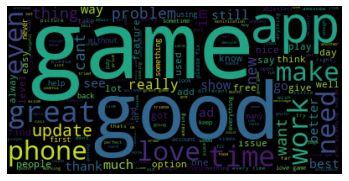

In [0]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = ""
for i in reviews_df['clean_reviews']:
  text = text + i + " "
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



1.   Introducing the dataset
2. Prepping the dataset for exploratory data analysis- data types
3. performing eda- charts, histograms 
4. perform queries
5. prep data for models- bow, remove null, urls, category,
6. perform models


